Source - http://jee3.web.rice.edu/neuralnets-1.r

Similar - [files](https://www.google.com/search?q=site%3Ajee3.web.rice.edu&oq=site%3Ajee3.web.rice.edu&aqs=chrome..69i57j69i58.10815j0j4&sourceid=chrome&es_sm=119&ie=UTF-8) [.r](https://www.google.com/search?num=100&newwindow=1&q=site%3Ajee3.web.rice.edu+filetype%3Ar&oq=site%3Ajee3.web.rice.edu+filetype%3Ar&gs_l=serp.3...73057.76281.0.76417.15.12.2.0.0.0.176.1122.9j3.12.0....0...1c.1.64.serp..15.0.0.qUJUf5yfX8w)



- [Lecture 4](jee3.web.rice.edu/506lecture4.r) # metropolis-hastings algorithm
- [Lecture 5](jee3.web.rice.edu/lecture5.r) # Hypothesis Testing # POLS 509: The Linear Model
- [Lecture 7](jee3.web.rice.edu/lecture7.r) # Multicollinearity, Heteroskedasticity, Omitted Variable Bias





In [1]:
rm(list=ls())
set.seed(1231239)

In [3]:
# Create an unusual regression problem
# Note that these variables will already have the proper scaling
x<-runif(1000)
z<-runif(1000)

# The relationship between y and the independent variables is complex and non-linear
y <- sin(3*pi*x)+cos(3*pi*z)+rnorm(1000, mean=0, sd=0.25)  

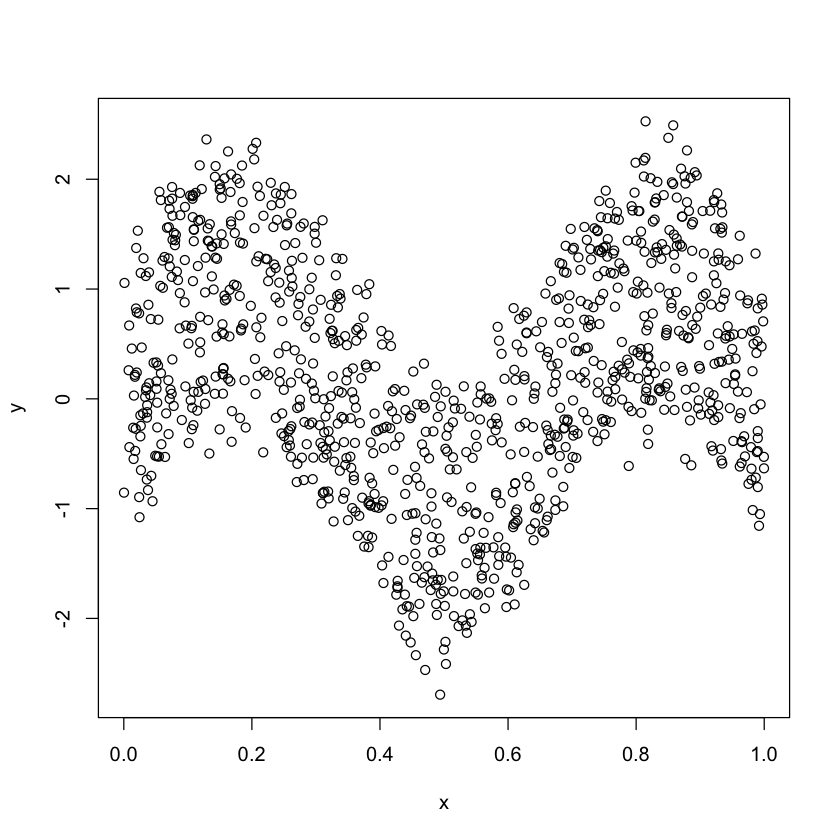

In [6]:
plot(y~x)

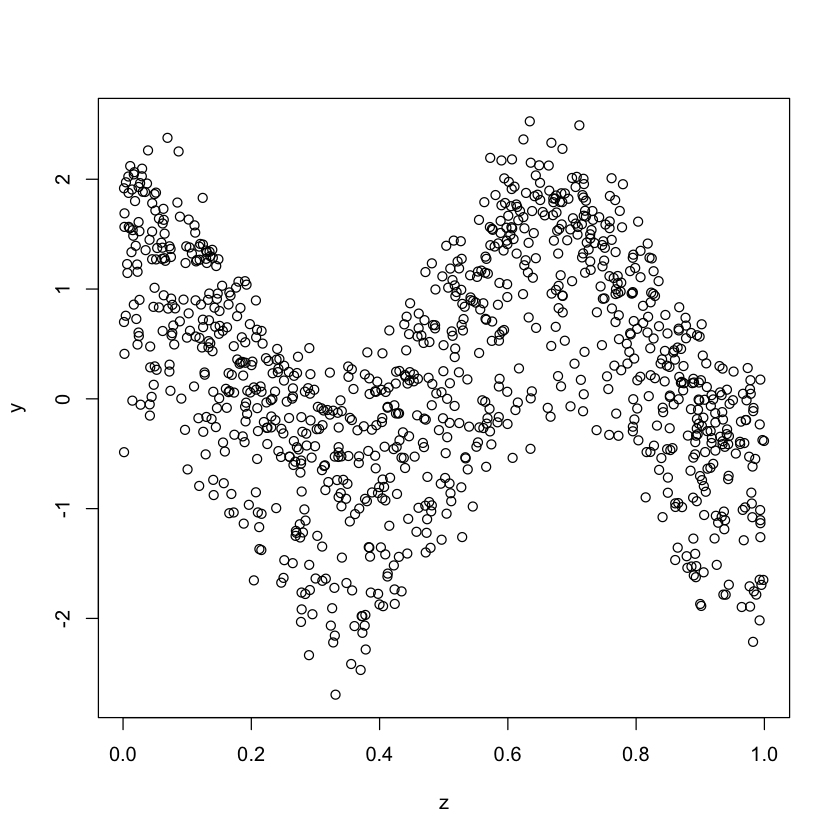

In [7]:
plot(y~z)

In [9]:
dat <- data.frame(x,z,y)
head(dat)

x         z          y
1 0.8225860 0.7617096  2.0093338
2 0.7727801 0.2511414  0.3014163
3 0.1983063 0.8107421  0.8470887
4 0.4507073 0.5044486 -1.0459147
5 0.2011791 0.6851081  2.2767409
6 0.7485589 0.9634779 -0.2077934

In [10]:
# Estimate a neural network with one hidden layer of 4 nodes
library(neuralnet)
nn <- neuralnet(y~x+z, data=dat, hidden=4, stepmax=2e05, 
              threshold=0.02, lifesign="full")

Loading required package: grid
Loading required package: MASS


hidden: 4    thresh: 0.02    rep: 1/1    steps:    1000	min thresh: 2.730590887
                                                   2000	min thresh: 0.5459937507
                                                   3000	min thresh: 0.5459937507
                                                   4000	min thresh: 0.5459937507
                                                   5000	min thresh: 0.5459937507
                                                   6000	min thresh: 0.5459937507
                                                   7000	min thresh: 0.5410992232
                                                   8000	min thresh: 0.4360211006
                                                   9000	min thresh: 0.3605557039
                                                  10000	min thresh: 0.329761228
                                                  11000	min thresh: 0.2847934125
                                                  12000	min thresh: 0.2812559402
                              

Warning message:
: algorithm did not converge in 1 of 1 repetition(s) within the stepmax

In [11]:
plot(nn)

ERROR: Error in plot.nn(nn): weights were not calculated


Warning message:
In is.na(weights): is.na() applied to non-(list or vector) of type 'NULL'

ERROR: Error in nrow[w] * ncol[w]: non-numeric argument to binary operator


ERROR: Error in eval(expr, envir, enclos): object 'y.fit' not found


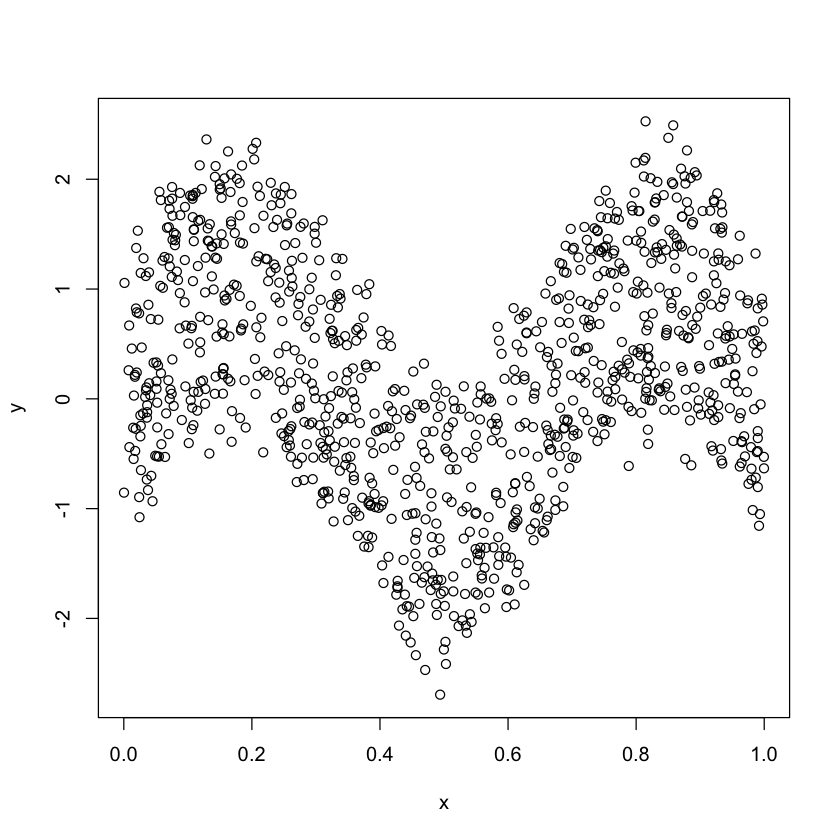

In [12]:
# Does the predictions of the neural network look good?
x.test <- seq(from=0, to=1, by=0.01)
y.fit <- compute(nn, covariate=matrix(c(x.test, rep(0.5, length(x.test))), nrow=length(x.test), ncol=2))$net.result
plot(y~x, data=dat)
lines(y.fit~x.test, type="l", col="red", lwd=2)

Warning message:
In is.na(weights): is.na() applied to non-(list or vector) of type 'NULL'

ERROR: Error in nrow[w] * ncol[w]: non-numeric argument to binary operator


ERROR: Error in eval(expr, envir, enclos): object 'y.fit' not found


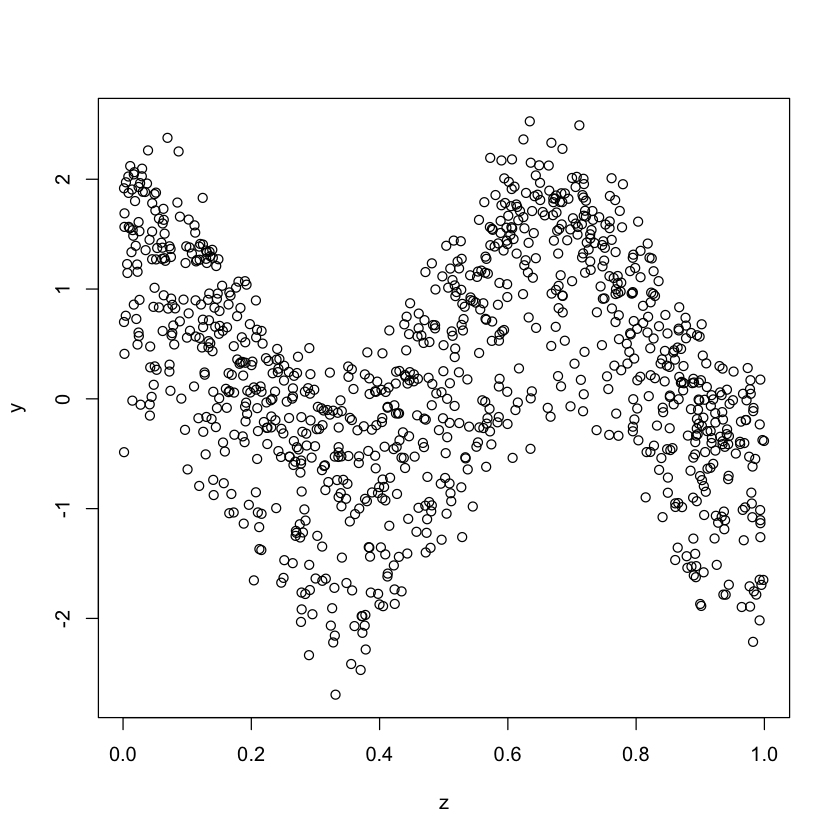

In [13]:
z.test<-seq(from=0, to=1, by=0.01)
y.fit<-compute(nn, covariate=matrix(c(rep(1, length(z.test)), z.test), nrow=length(z.test), ncol=2))$net.result
plot(y~z, data=dat)
lines(y.fit~z.test, type="l", col="red", lwd=2)
#...no. We need to allow a more complex fitting surface.

In [14]:
# Try eight nodes in the hidden layer.
nn <- neuralnet(y~x+z, data=dat, hidden=8, stepmax=2e05, 
              threshold=0.02, lifesign="full")

hidden: 8    thresh: 0.02    rep: 1/1    steps:    1000	min thresh: 2.224106559
                                                   2000	min thresh: 1.384429462
                                                   3000	min thresh: 0.9791680197
                                                   4000	min thresh: 0.7641546278
                                                   5000	min thresh: 0.6470942185
                                                   6000	min thresh: 0.6470942185
                                                   7000	min thresh: 0.6470942185
                                                   8000	min thresh: 0.6470942185
                                                   9000	min thresh: 0.6470942185
                                                  10000	min thresh: 0.5211842734
                                                  11000	min thresh: 0.3836474055
                                                  12000	min thresh: 0.2939691328
                              

In [17]:
plot(nn)

dev.new(): using pdf(file="Rplots4.pdf")


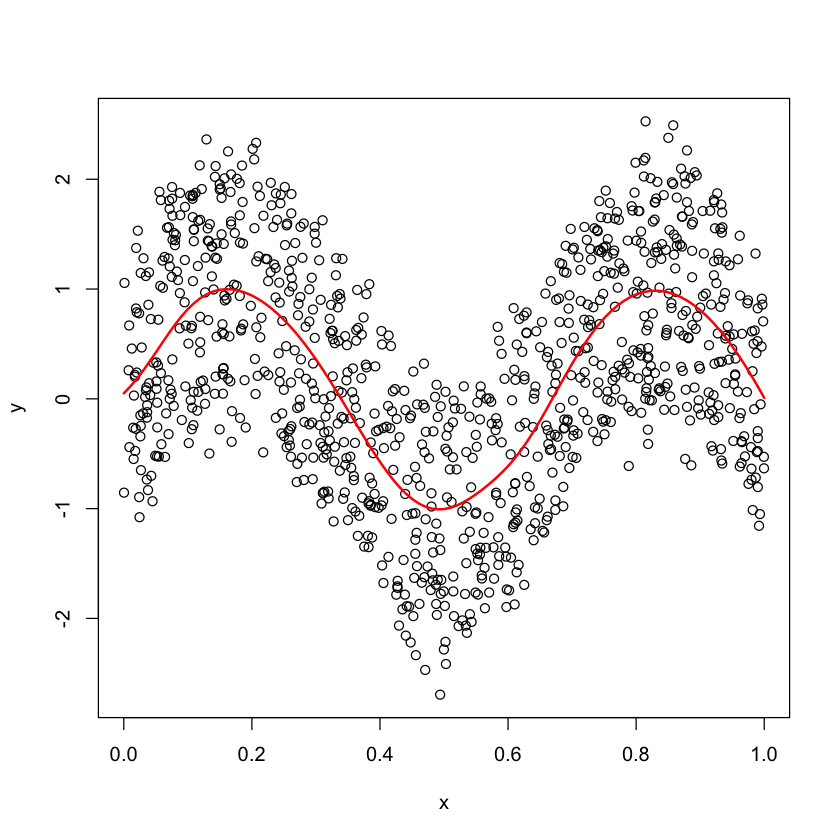

In [18]:
x.test<-seq(from=0, to=1, by=0.01)
y.fit<-compute(nn, covariate=matrix(c(x.test, rep(0.5, length(x.test))), nrow=length(x.test), ncol=2))$net.result
plot(y~x, data=dat)
lines(y.fit~x.test, type="l", col="red", lwd=2)

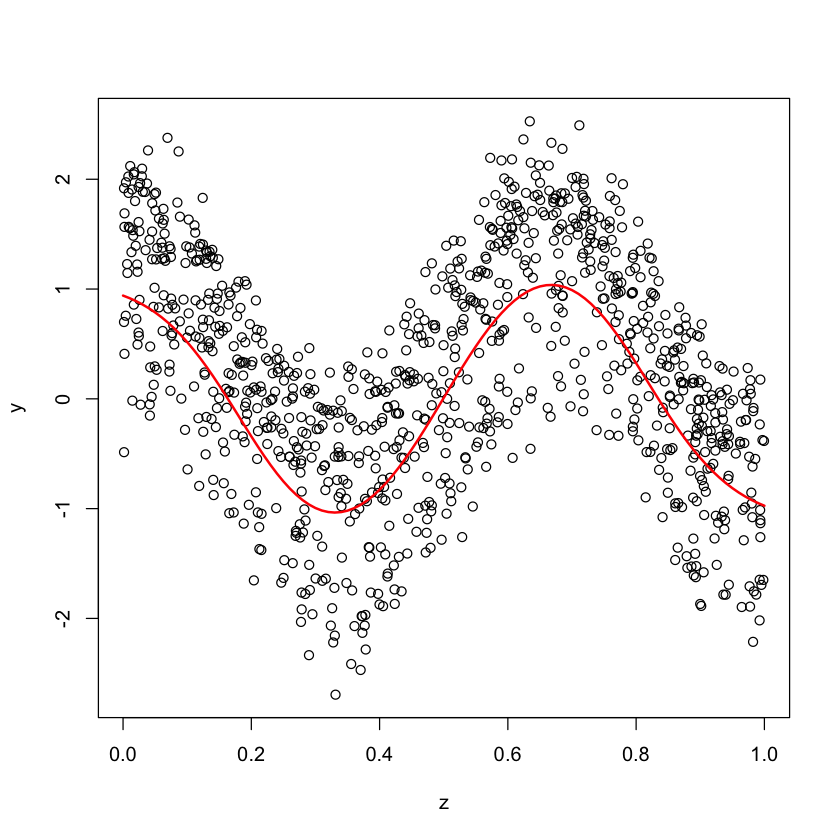

In [19]:
z.test<-seq(from=0, to=1, by=0.01)
y.fit<-compute(nn, covariate=matrix(c(rep(1, length(z.test)), z.test), nrow=length(z.test), ncol=2))$net.result
plot(y~z, data=dat)
lines(y.fit~z.test, type="l", col="red", lwd=2)
# much better!

In [24]:
rm(list=ls())
set.seed(29124)

In [25]:
# create a complex classification problem
x <- runif(1000)
z <- runif(1000)
o <- order(z)

In [26]:
# the points will lie (noisily) in one class if inside
# a circle centered at zero with radius (0.5)^(1/2), and 
# in another class if outside this circle
y <- ifelse(x^2 + z^2 + runif(1000, min=-0.15, max=0.15)>0.5, 1, 0)

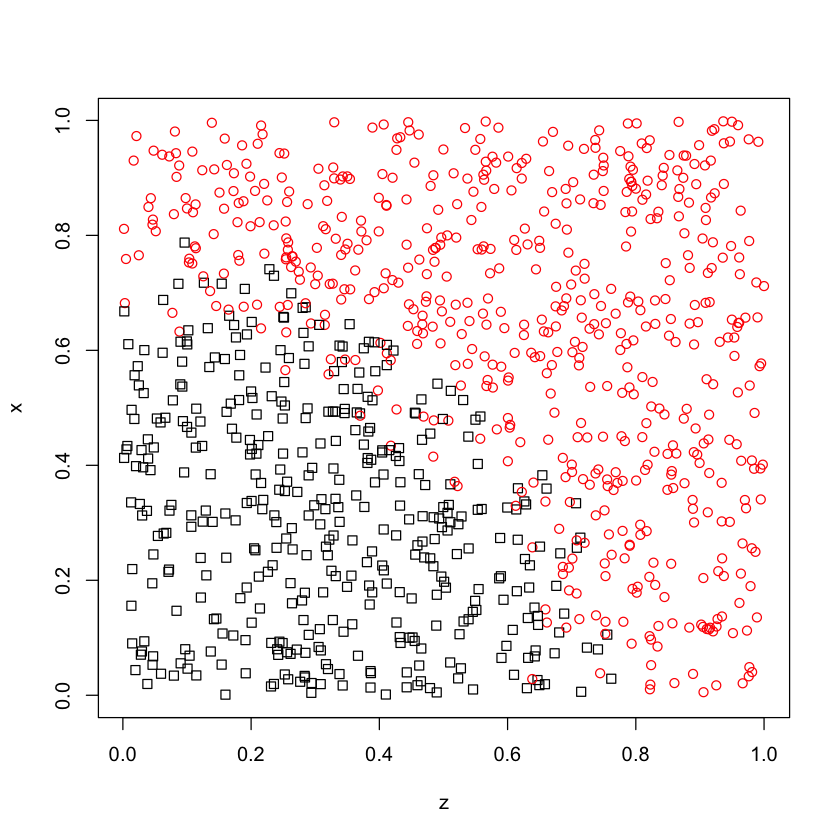

In [27]:
plot(x~z, col=y+1, pch = y)

In [28]:
dat<-data.frame(x,z,y)

In [29]:
# can a glm (probit) model correctly classify these observations?
glm.mod<-glm(y~x+z, family=binomial)

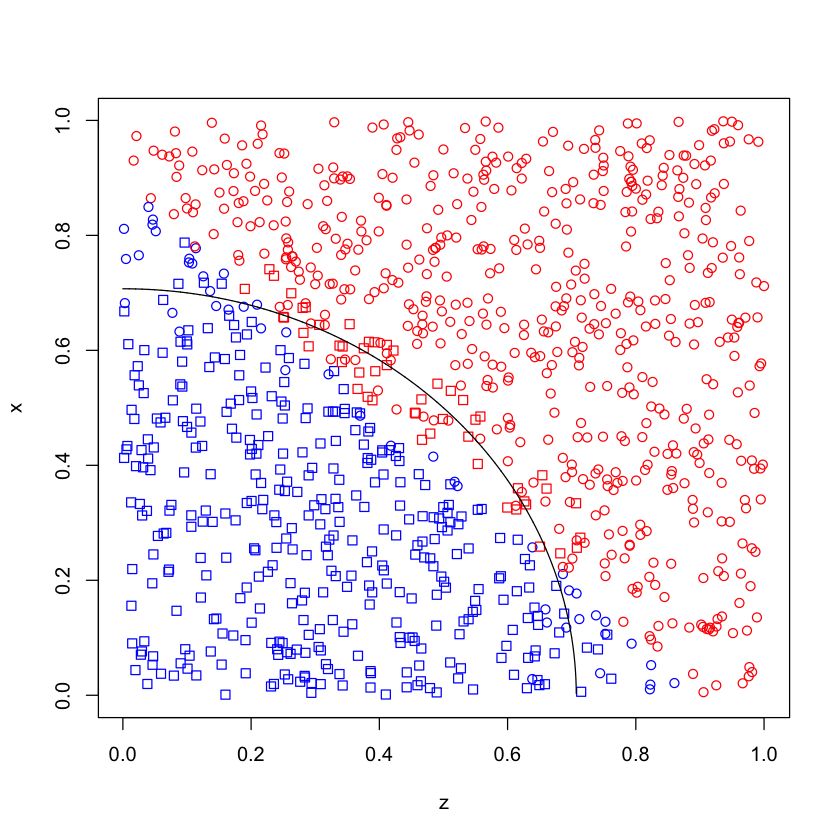

In [30]:
glm.class<-ifelse(predict(glm.mod, type="response")>0.5, "red", "blue")
plot(x~z, pch=y, col=glm.class)
z.plot<-seq(from=0, to=sqrt(0.5), by=0.0001)
lines(sqrt(0.5-z.plot^2)~z.plot)
#...no, or at least not without some substantial modification
# (like polynomial terms). It draws a line through the circular boundary space.

In [41]:
# a neural network with a single layer of four hidden nodes
# performs this easily.
library(neuralnet)
nn<-neuralnet(y~x+z, data=dat, linear.output=FALSE, hidden=4, lifesign="full")

hidden: 4    thresh: 0.01    rep: 1/1    steps:    1000	min thresh: 0.02748038646
                                                   2000	min thresh: 0.02748038646
                                                   3000	min thresh: 0.02748038646
                                                   4000	min thresh: 0.02166207774
                                                   5000	min thresh: 0.02166207774
                                                   6000	min thresh: 0.02166207774
                                                   7000	min thresh: 0.02166207774
                                                   8000	min thresh: 0.02166207774
                                                   9000	min thresh: 0.02166207774
                                                  10000	min thresh: 0.02166207774
                                                  11000	min thresh: 0.02166207774
                                                  12000	min thresh: 0.02166207774
                

In [42]:
plot(nn)

dev.new(): using pdf(file="Rplots47.pdf")


Data Error:	0;


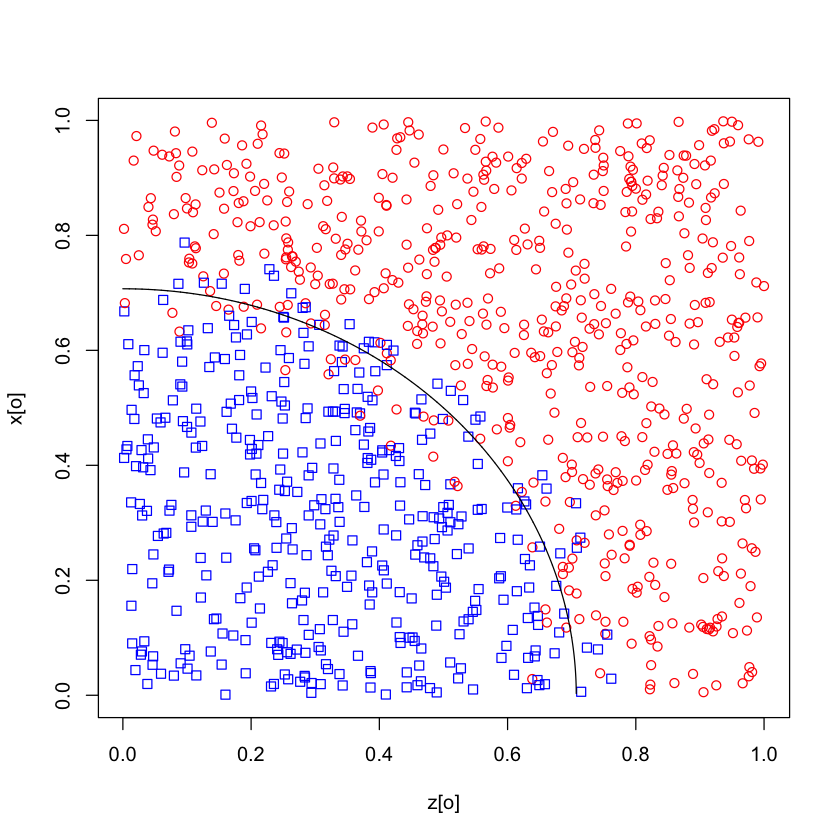

In [23]:
# inside the sample data set, the neural network model classifies
# quite well.
nn.dat<-prediction(nn)$data
nn.class<-ifelse(nn.dat[,"y"]>0.5, "red", "blue")
plot(x[o]~z[o], pch=y[o], col=nn.class)
z.plot<-seq(from=0, to=sqrt(0.5), by=0.0001)
lines(sqrt(0.5-z.plot^2)~z.plot)
# ...maybe a little too well. Might be some evidence of overfitting.
# How does it do out of sample?

In [44]:
#?compute # - Computation of a given neural network for given covariate vectors

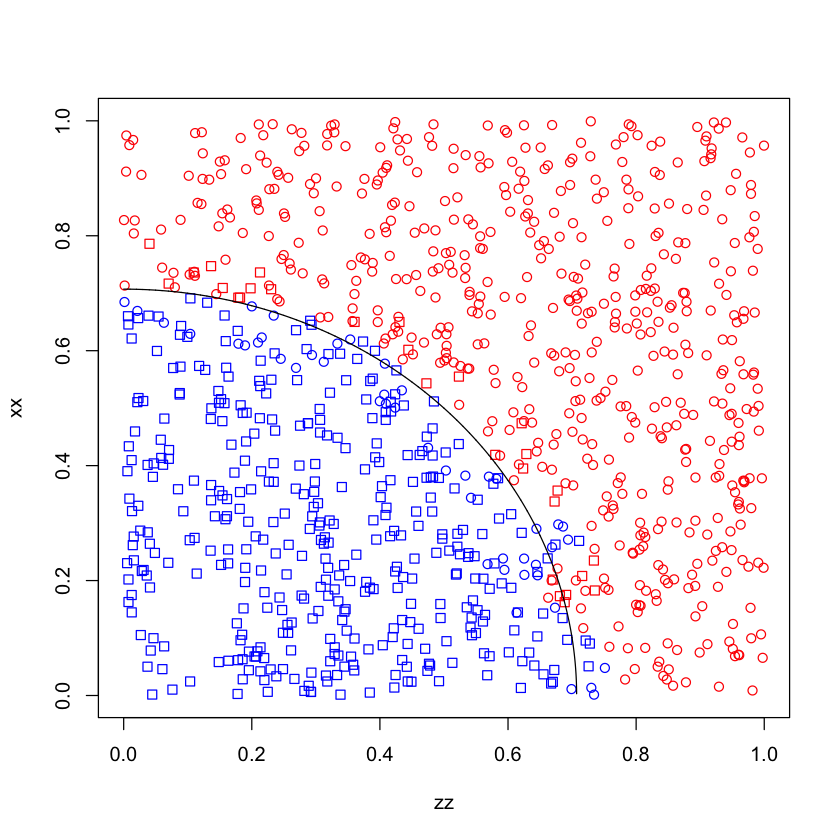

In [24]:
xx<-runif(1000)
zz<-runif(1000)
yy<-ifelse(xx^2+zz^2+runif(1000, min=-0.15, max=0.15)>0.5, 1, 0)

nn.class.p <- ifelse(compute(nn, covariate=data.frame(x=xx, z=zz))$net.result>0.5, 
                     "red", "blue")
plot(xx~zz, pch=yy, col=nn.class.p)
z.plot<-seq(from=0, to=sqrt(0.5), by=0.0001)
lines(sqrt(0.5-z.plot^2)~z.plot)
# ah, much better. We have almost perfect separation of the classes at the limit
# of what is possible given noise levels.

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'ROCR'

The following object is masked from 'package:neuralnet':

    prediction



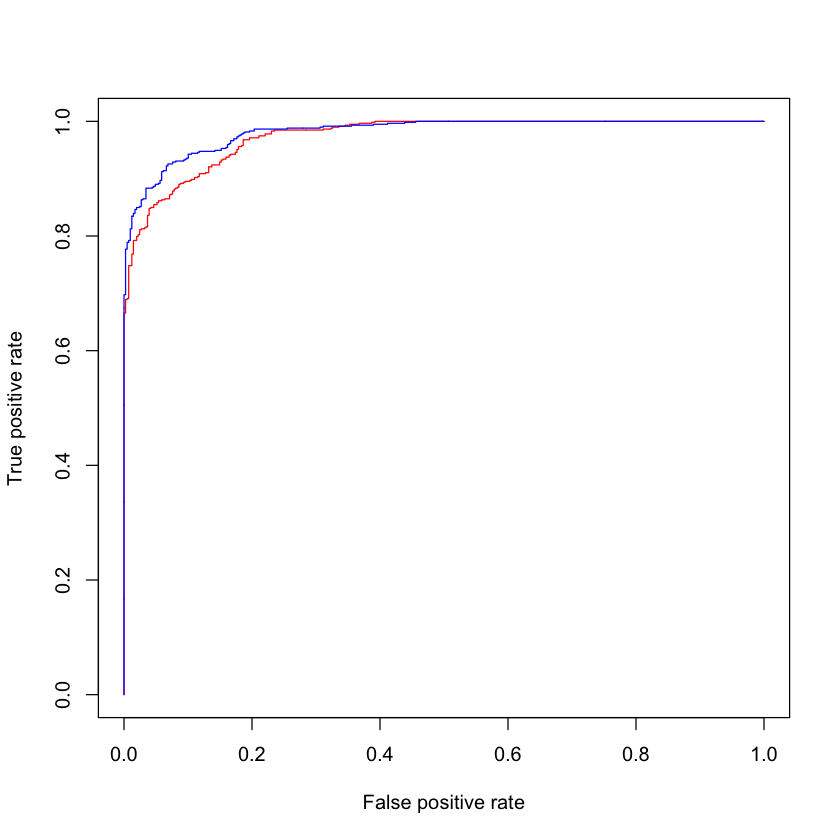

In [25]:
# We can compare the out-of-sample fit characteristics of the glm
# model and the neural network model using the ROC curve.
glm.class.y <- predict(glm.mod, type="response", newdata=data.frame(x=xx, z=zz))
library(ROCR)
pred <- prediction(predictions=glm.class.y, labels=yy)
perf <- performance(pred, measure = "tpr", x.measure = "fpr") 
plot(perf, col=rainbow(10))

nn.class.py <- compute(nn, covariate=data.frame(x=xx, z=zz))$net.result
pred <- prediction(predictions=nn.class.py, labels=yy)
perf <- performance(pred, measure = "tpr", x.measure = "fpr") 
plot(perf, col="blue", add=T)
#...not surprisingly, the neural network model does better.

In [26]:
rm(list=ls())
set.seed(02134)

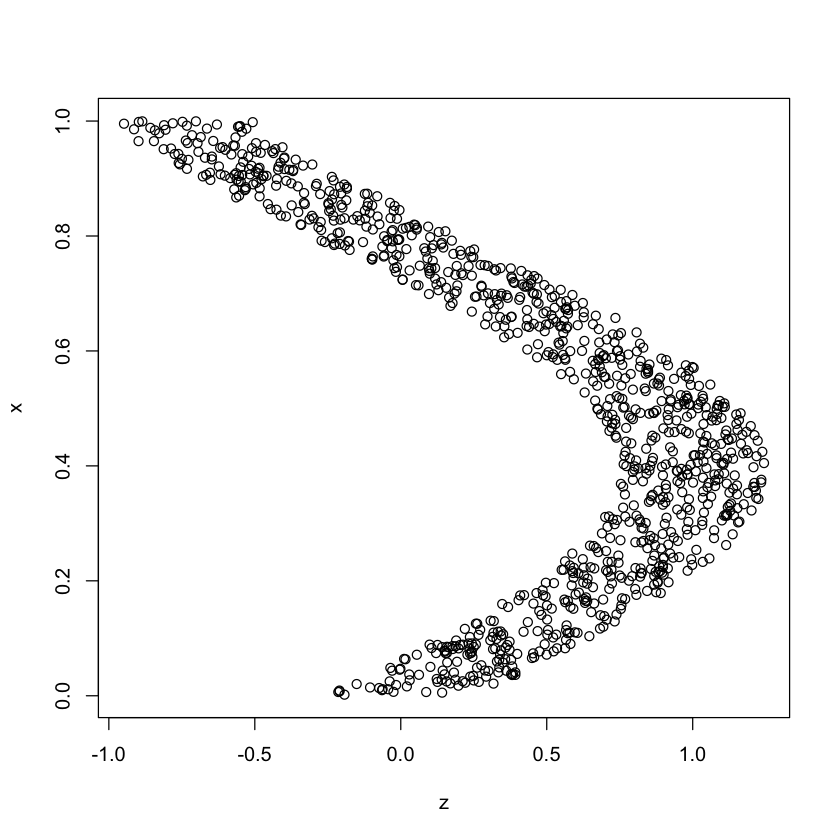

In [27]:
# create a non-linear feature extraction problem
x<-runif(1000)
z<-sin(4*x)+runif(1000, min=-0.25, max=0.25)
plot(x~z)

In [28]:
# x and z clearly have a rather complex common dimensionality.
# We could map the values of x and z that we observe to the 
# value of a continuous variable. And what would that continuous
# variable be?

library(pcaMethods)
pca.nn<-nlpca(cbind(scale(x),scale(z)), nPcs=1, maxSteps=1000)

Warning message:
: package 'pcaMethods' was built under R version 3.2.2Loading required package: Biobase
Warning message:
: package 'Biobase' was built under R version 3.2.2Loading required package: BiocGenerics
Warning message:
: package 'BiocGenerics' was built under R version 3.2.2Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,


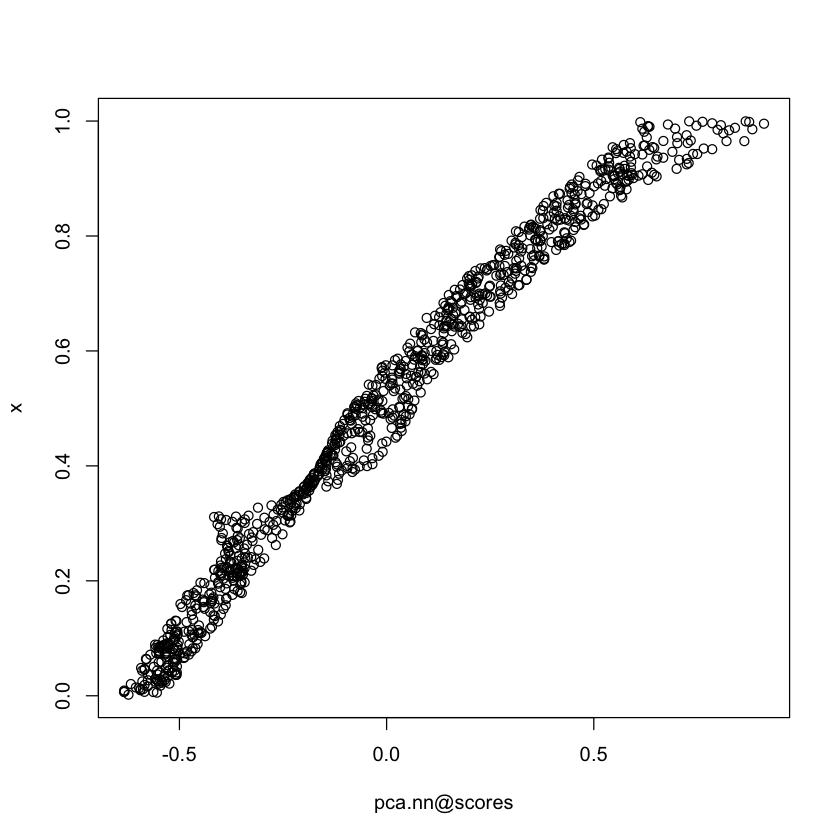

In [29]:
# What is the hidden dimension?
plot(x~pca.nn@scores)

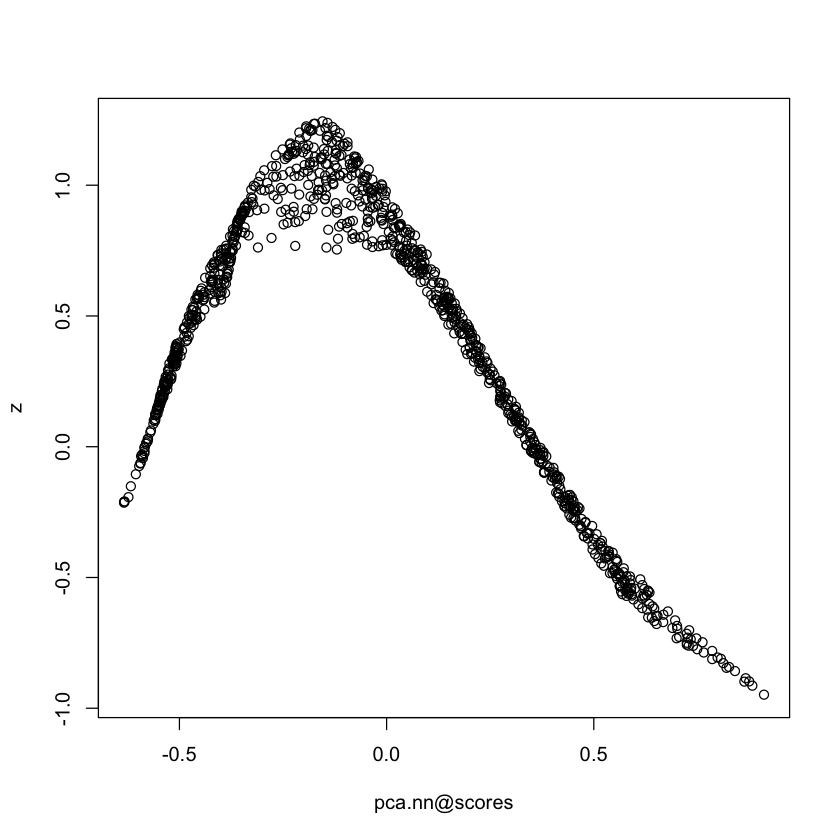

In [30]:
plot(z~pca.nn@scores)

# so the hidden dimension is associated with small values of z for 
# large and small vales, and large values of z for middling values.